In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time

import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# Производим чтение теоретического датасета

In [2]:
df_th = pd.read_csv(r'C:\Users\Kamov\platelets\BD_platelets_regular_1_degre.csv', sep=';')
df_th.head()

,r,eps,n,beta,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90
0,0.5,0.1,1.3725,40,25.301178,24.938040,23.876934,22.199476,20.031181,17.527292,...,0.011513,0.014099,0.017986,0.023523,0.031062,0.040932,0.053408,0.068672,0.086786,0.107647
1,0.5,0.1,1.3725,42,25.253750,24.898931,23.861731,22.220762,20.097038,17.640442,...,0.040937,0.052109,0.065620,0.081594,0.100038,0.120814,0.143610,0.167922,0.193053,0.218120
2,0.5,0.1,1.3725,44,25.202293,24.855852,23.842764,22.238726,20.160351,17.752266,...,0.116834,0.137759,0.160166,0.183575,0.207347,0.230691,0.252689,0.272336,0.288599,0.300487
3,0.5,0.1,1.3725,46,25.143423,24.805452,23.816780,22.250275,20.218254,17.860188,...,0.226089,0.248032,0.268256,0.285895,0.300072,0.309963,0.314847,0.314183,0.307667,0.295287
4,0.5,0.1,1.3725,48,25.076042,24.746632,23.782681,22.254311,20.269676,17.963202,...,0.316910,0.325093,0.328297,0.326098,0.318296,0.304946,0.286385,0.263235,0.236381,0.206933


# Производим чтение экспериментального датасета

In [3]:
df_exp = pd.read_csv(r'C:\Users\Kamov\platelets\experimental_1_degree.csv', sep=';')
df_exp.head()

,10,11,12,13,14,15,16,17,18,19,...,61,62,63,64,65,66,67,68,69,70
0,183.176875,166.478693,134.478772,116.654527,98.472286,78.717751,62.504292,57.866845,49.507113,45.329470,...,3.499498,1.986927,2.974273,1.984659,2.357138,0.593534,-0.434256,-0.257839,-1.024817,NaN
1,74.758799,72.793755,65.249161,66.274876,59.231701,61.344619,52.165751,44.154889,41.012489,34.339016,...,1.738917,1.372427,-0.090051,-0.439739,-0.253310,-0.232650,-1.538535,-0.431494,-0.606203,NaN
2,878.528295,608.147687,422.259021,284.829020,174.500711,104.376918,57.810083,37.118711,28.380340,28.736102,...,-0.362481,0.055591,0.368540,-0.222707,-0.043057,-0.447811,0.499172,0.157822,-0.622346,NaN
3,555.969393,431.583247,345.706680,280.833703,231.427627,179.745473,144.822840,124.502582,94.629270,74.394734,...,-1.668954,-1.835357,-2.323255,-1.719203,0.114578,0.697275,0.605574,0.077802,-2.068405,NaN
4,340.091255,268.053440,213.270653,170.341848,128.769485,95.481732,81.011077,53.541826,36.837450,25.841330,...,3.220378,3.556445,2.990620,-0.043619,0.694566,0.544178,0.696334,0.563298,0.477633,NaN


# Выбираем нужные данные из теоретического и экспериментального датафрейма
* Для решения задачи, выбираются индикатрисы с диапазоном углов 10-69 градусов 

In [4]:
X_th = df_th[[str(x) for x in range(10,70)]]
Y_th = df_th[['r', 'eps', 'n', 'beta']]

X_exp = df_exp[[str(x) for x in range(10,70)]]


X_th = np.array(X_th)
Y_th = np.array(Y_th)

X_exp = np.array(X_exp)

# Разбиваем теоретический и практический датасет на обучающую и тестовую выборку 
* Размер тестовой выборки 2% от теоретического датасета

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_th, Y_th, test_size=0.02, shuffle=True)

# Проводим MinMax скалирование для всех данных 
* Для теоретических данных скалируем целевой вектор переменных 
* Для тестовых данных также скалируем целевой вектор переменных

In [6]:
Y_scaler =  MinMaxScaler()
Y_scaler.fit(Y_train)

Y_train_scaled = Y_scaler.transform(Y_train)
Y_test_scaled = Y_scaler.transform(Y_test)

# Инициализируем модель машинного обучения catboost и обучаем её
#### Параметры модели:
* Функция потерь - MultiRMSE
* Количество итераций обучения - 40,000
* Скорость обучения - 0.2

In [7]:
cat = CatBoostRegressor(loss_function="MultiRMSE", iterations=10000, learning_rate=0.5, verbose=100)
cat.fit(X_train, Y_train_scaled)

0:	learn: 0.5252721	total: 279ms	remaining: 46m 33s
100:	learn: 0.2884052	total: 10.2s	remaining: 16m 44s
200:	learn: 0.2526936	total: 20.2s	remaining: 16m 25s
300:	learn: 0.2328723	total: 29.8s	remaining: 15m 58s
400:	learn: 0.2187390	total: 39.5s	remaining: 15m 46s
500:	learn: 0.2086762	total: 49.6s	remaining: 15m 40s
600:	learn: 0.2007307	total: 59.4s	remaining: 15m 29s
700:	learn: 0.1932662	total: 1m 8s	remaining: 15m 4s
800:	learn: 0.1868658	total: 1m 16s	remaining: 14m 42s
900:	learn: 0.1813253	total: 1m 25s	remaining: 14m 27s
1000:	learn: 0.1762631	total: 1m 34s	remaining: 14m 10s
1100:	learn: 0.1714621	total: 1m 43s	remaining: 13m 55s
1200:	learn: 0.1669131	total: 1m 52s	remaining: 13m 43s
1300:	learn: 0.1632207	total: 2m 1s	remaining: 13m 30s
1400:	learn: 0.1595103	total: 2m 10s	remaining: 13m 22s
1500:	learn: 0.1558861	total: 2m 20s	remaining: 13m 13s
1600:	learn: 0.1526908	total: 2m 28s	remaining: 13m 1s
1700:	learn: 0.1497132	total: 2m 38s	remaining: 12m 54s
1800:	learn: 0.

In [11]:
Y_predict_scaled = cat.predict(X_test)
Y_predict_exp_scaled = cat.predict(X_exp)

In [12]:
def regr_model_resume(_y_test, _y_pred, method='kd_tree + max_min_scaler'):

    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score

    params = ['r','eps', 'n', 'beta']
    mse = mean_squared_error(_y_pred, _y_test, multioutput='raw_values', squared=True)
    mae = mean_absolute_error(_y_pred, _y_test, multioutput='raw_values')
    r2 = r2_score(_y_pred, _y_test, multioutput='raw_values')
    
    metrics= np.array([mae, mse, r2]).T
    metrics = np.around(metrics, 4)
    
    plt.figure(figsize=(20, 10))
    plt.suptitle(f'Метод: {method}', fontsize='40')
    N = len(params)
    M = 2
    for i in range(N):

        plt.subplot(M, N, i + 1)
        plt.title("Корреляционный график")
        plt.xlabel(params[i] + ' Тестовые')
        plt.ylabel(params[i] + ' Предсказанные')
        plt.plot(_y_test[:, i], _y_pred[:, i], '.', alpha = 0.3)
    
    plt.subplot(2, 1, 2)
    ax = plt.gca() 
    fig = plt.gcf()
    
    ax.axis('off')
    table = plt.table(cellText=metrics, colLabels = ['mae', 'rmse', 'r2'], rowLabels = params, loc='center', colWidths=[0.1]*3)
    table.set_fontsize(17)
    table.scale(1,2)
    plt.subplots_adjust(hspace=1.0, wspace=0.5)
    
    plt.show()
    

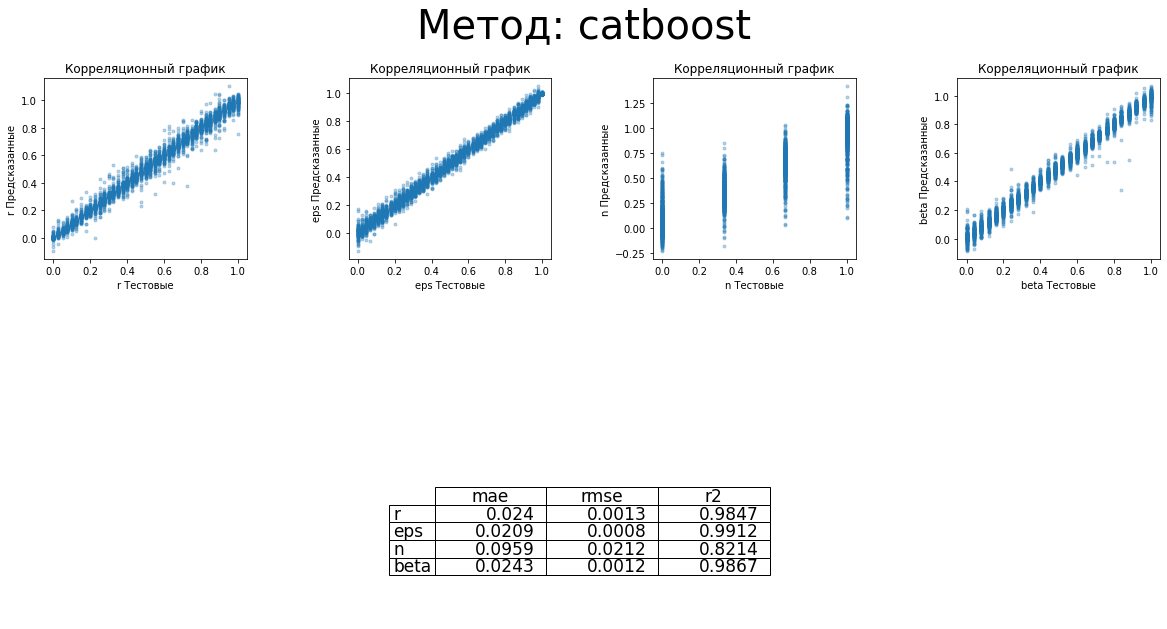

In [13]:
regr_model_resume(Y_test_scaled, Y_predict_scaled,method='catboost')

In [14]:
def volume_resume(_y_pred):
    vol = 4 / 3 * np.pi * (_y_pred[:,0] ** 3)
    #vol = _y_pred[:,0]
    plt.title("Распредление тромбоцитов по объему")

    plt.ylabel('Количество, у.е.')
    plt.xlabel('Объем тромбоцита, фЛ')
    plt.hist(vol , bins = 20)
    plt.show()

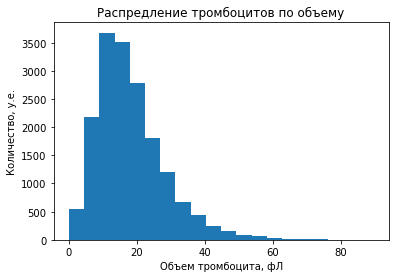

In [16]:
volume_resume(Y_scaler.inverse_transform(Y_predict_exp_scaled))